# Classification of MNIST digits with dense layers

## Loading the image data

In [0]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

## Preparing the image data

In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

## Preparing the labels

We need to categorically encode the labels.

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

## Setting up the hand-crafted features


### Number of Connected Components

In [0]:
next_label = 2

def flood_fill_single_region(img, row, col, label):
    # Base Case: If row or col is out of image boundary return
    if row < 0 or col < 0 or row > 27 or col > 27:
        return

    if img[row][col] > 0:
        return

    
    if img[row][col] == 0:
        img[row][col] = label
    
        flood_fill_single_region(img, row - 1, col, label)
        flood_fill_single_region(img, row + 1, col, label)
        flood_fill_single_region(img, row, col - 1 , label)
        flood_fill_single_region(img, row, col + 1, label)
    
    global next_label 
    next_label = label + 1
    

def make_image_black_white(img):
    bw_img = np.copy(img)

    for row in range(28):
        for col in range(28):
            if bw_img[row][col] > 127:
                bw_img[row][col] = 1.0
            else:
                bw_img[row][col] = 0.0

    return bw_img

def number_regions(img):
    new_image = make_image_black_white(img) # Returns copy fixed
    global next_label
    next_label = 2 # Reset label when starting new region
    
    for row in range(28):
       for col in range(28):
           flood_fill_single_region(new_image, row, col, next_label)
    return (next_label - 2)

### Height & Width

In [0]:
def height(img):
    maxHeight = 0

    for col in range(28):
        min = 0
        max = 27

        # print("COL ", col)
        # print()
        # print()

        while max > min:
            if img[min][col] == 0:
                # print("Moving min :)")
                min += 1
            if img[max][col] == 0:
                # print("Moving max :)")
                max -= 1
            
            if img[min][col] > 0 and img[max][col] > 0:
                if (max - min) > maxHeight:
                    maxHeight = max - min
                break

    return maxHeight

def width(img):
    maxWidth = 0

    for row in range(28):
        min = 0
        max = 27

        while max > min:
            if img[row][min] == 0:
                min += 1
            if img[row][max] == 0:
                max -= 1
            
            if img[row][min] > 0 and img[row][max] > 0:
                if (max - min) > maxWidth:
                    maxWidth = max - min + 1
                break

    return maxWidth

### Concatenating the data

In [0]:
train_data = np.zeros((60000, 787))

for x in range(60000):
    # Just so I can see it actually working.
    print("Image: ", x)
    new_feats = np.array([])
    new_feats = np.append(new_feats, number_regions(train_images_original[x]))
    new_feats = np.append(new_feats, height(train_images_original[x]))
    new_feats = np.append(new_feats, width(train_images_original[x]))

    train_data[x] = np.concatenate((train_images[x], new_feats))

train_data.shape

Image:  0
Image:  1
Image:  2
Image:  3
Image:  4
Image:  5
Image:  6
Image:  7
Image:  8
Image:  9
Image:  10
Image:  11
Image:  12
Image:  13
Image:  14
Image:  15
Image:  16
Image:  17
Image:  18
Image:  19
Image:  20
Image:  21
Image:  22
Image:  23
Image:  24
Image:  25
Image:  26
Image:  27
Image:  28
Image:  29
Image:  30
Image:  31
Image:  32
Image:  33
Image:  34
Image:  35
Image:  36
Image:  37
Image:  38
Image:  39
Image:  40
Image:  41
Image:  42
Image:  43
Image:  44
Image:  45
Image:  46
Image:  47
Image:  48
Image:  49
Image:  50
Image:  51
Image:  52
Image:  53
Image:  54
Image:  55
Image:  56
Image:  57
Image:  58
Image:  59
Image:  60
Image:  61
Image:  62
Image:  63
Image:  64
Image:  65
Image:  66
Image:  67
Image:  68
Image:  69
Image:  70
Image:  71
Image:  72
Image:  73
Image:  74
Image:  75
Image:  76
Image:  77
Image:  78
Image:  79
Image:  80
Image:  81
Image:  82
Image:  83
Image:  84
Image:  85
Image:  86
Image:  87
Image:  88
Image:  89
Image:  90
Image:  9

(60000, 787)

In [0]:
test_data = np.zeros((10000, 787))

for x in range(10000):
    # Just so I can see it actually working.
    print("Image: ", x)
    new_feats = np.array([])
    new_feats = np.append(new_feats, number_regions(test_images_original[x]))
    new_feats = np.append(new_feats, height(test_images_original[x]))
    new_feats = np.append(new_feats, width(test_images_original[x]))

    test_data[x] = np.concatenate((test_images[x], new_feats))

test_data.shape

Image:  0
Image:  1
Image:  2
Image:  3
Image:  4
Image:  5
Image:  6
Image:  7
Image:  8
Image:  9
Image:  10
Image:  11
Image:  12
Image:  13
Image:  14
Image:  15
Image:  16
Image:  17
Image:  18
Image:  19
Image:  20
Image:  21
Image:  22
Image:  23
Image:  24
Image:  25
Image:  26
Image:  27
Image:  28
Image:  29
Image:  30
Image:  31
Image:  32
Image:  33
Image:  34
Image:  35
Image:  36
Image:  37
Image:  38
Image:  39
Image:  40
Image:  41
Image:  42
Image:  43
Image:  44
Image:  45
Image:  46
Image:  47
Image:  48
Image:  49
Image:  50
Image:  51
Image:  52
Image:  53
Image:  54
Image:  55
Image:  56
Image:  57
Image:  58
Image:  59
Image:  60
Image:  61
Image:  62
Image:  63
Image:  64
Image:  65
Image:  66
Image:  67
Image:  68
Image:  69
Image:  70
Image:  71
Image:  72
Image:  73
Image:  74
Image:  75
Image:  76
Image:  77
Image:  78
Image:  79
Image:  80
Image:  81
Image:  82
Image:  83
Image:  84
Image:  85
Image:  86
Image:  87
Image:  88
Image:  89
Image:  90
Image:  9

(10000, 787)

## The network architecture

In [0]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(10, activation='softmax', input_shape=(787,)))
network.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                7880      
Total params: 7,880
Trainable params: 7,880
Non-trainable params: 0
_________________________________________________________________


## The compilation step

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## The training step

In [0]:
epochs = 10
history = network.fit(train_data, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_data, test_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10



60000/60000 [==============================] - 7s 116us/step - loss: 0.5978 - acc: 0.8457 - val_loss: 0.3101 - val_acc: 0.9185
Epoch 2/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.2935 - acc: 0.9191 - val_loss: 0.2672 - val_acc: 0.9245
Epoch 3/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.2581 - acc: 0.9279 - val_loss: 0.2423 - val_acc: 0.9331
Epoch 4/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.2407 - acc: 0.9325 - val_loss: 0.2306 - val_acc: 0.9364
Epoch 5/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.2303 - acc: 0.9354 - val_loss: 0.2281 - val_acc: 0.9376
Epoch 6/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.2230 - acc: 0.9378 - val_loss: 0.2220 - val_acc: 0.9383
Epoch 7/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.2175 - acc: 0.9393 - val_loss: 0.2170 - val_acc: 0.9397
Epoch 8/10
60000/60000 [===========================

## Display the training/test loss/accuracy

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

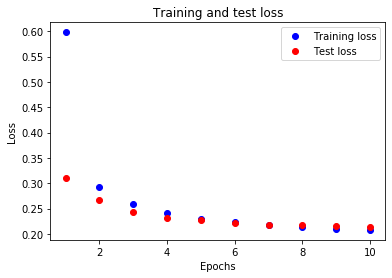

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

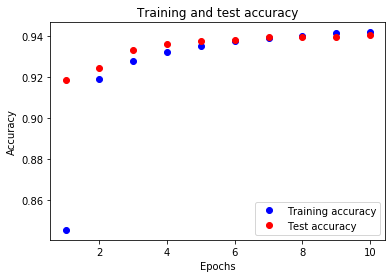

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()